In [2]:
import os
from pytextdist.preprocessing import phrase_preprocessing

In [63]:
# Diversity Metrics
import os
from pytextdist.preprocessing import phrase_preprocessing
from pytextdist.edit_distance import levenshtein_distance, levenshtein_similarity
from pytextdist.edit_distance import lcs_distance, lcs_similarity
from pytextdist.edit_distance import damerau_levenshtein_distance, damerau_levenshtein_similarity
from pytextdist.edit_distance import hamming_distance, hamming_similarity
from pytextdist.edit_distance import jaro_similarity, jaro_winkler_similarity
from pytextdist.vector_similarity import cosine_similarity
from pytextdist.vector_similarity import jaccard_similarity
from pytextdist.vector_similarity import sorensen_dice_similarity
from pytextdist.vector_similarity import qgram_similarity
import pandas as pd
import textdistance

# pathReal = str(os.getcwd()) + '\HEPSYCODE\D1\HEPSY' + '\\'
# pathLLM = str(os.getcwd()) + '\D2-HEPSYCODE-NoRAG\LLM-gpt-4-turbo-2024-04-09-1.0' + '\\'

pathReal = str(os.getcwd()) + '\BPMN-Designer\D1\BPMN-HD' + '\\'
pathLLM = str(os.getcwd()) + '\D2-BPMN-Designer-RAG\LLM-gpt-4-turbo-2024-04-09-1.0' + '\\'

# LLM-mistral-small-latest-0.0, LLM-mistral-large-latest-0.0, LLM-gpt-4o-2024-08-06-0.0, LLM-gpt-4-turbo-2024-04-09-0.0

print(pathReal)

# pathFileNameResCsv = 'results/HEPSYCODE/Semantic-NoRAG/Semantic-LLM-gpt-4-turbo-2024-04-09-1.0.csv'
# pathFileNameResXlsx = 'results/HEPSYCODE/Semantic-NoRAG/Semantic-LLM-gpt-4-turbo-2024-04-09-1.0.xlsx'

pathFileNameResCsv = 'results/BPMN-Designer/Semantic-RAG/Semantic-LLM-gpt-4-turbo-2024-04-09-1.0.csv'
pathFileNameResXlsx = 'results/BPMN-Designer/Semantic-RAG/Semantic-LLM-gpt-4-turbo-2024-04-09-1.0.xlsx'

data = []
for rootReal, dirsReal, filesReal in os.walk(pathReal):
    for fileReal in filesReal:
        if fileReal.endswith(".bpmn"): # .hepsy / .bpmn
            pathfileReal = pathReal + fileReal
            print(pathfileReal)
            file1Real = open(pathfileReal, 'r')
            LinesReal = file1Real.read()
            indexC = 0
            cosine = []
            jaccard = []
            sorensen_dice = []
            qgram = []
            for rootFake, dirsFake, filesFake in os.walk(pathLLM):
                for fileFake in filesFake:
                    if fileFake.endswith(".bpmn") and fileFake == fileReal:  # .hepsy / .bpmn
                        pathfileFake = pathLLM + fileFake
                        file2Fake = open(pathfileFake, 'r')
                        LinesFake = file2Fake.read()
                        
                        # 'Hamming-Dist': hamming_distance(LinesReal, LinesFake),
                        # 'Hamming-Sim': hamming_similarity(LinesReal, LinesFake),
                        
                        data.append({'File': fileFake, 
                                     'Levenshtein-Dist': levenshtein_distance(LinesReal, LinesFake),
                                     'Levenshtein-Sim': levenshtein_similarity(LinesReal, LinesFake),
                                     'LCS-Dist': lcs_distance(LinesReal, LinesFake),
                                     'LCS-Sim': lcs_similarity(LinesReal, LinesFake),
                                     # 'Damerau-Levenshtein-Dist': damerau_levenshtein_distance(LinesReal, LinesFake),
                                     # 'Damerau-Levenshtein-Sim': damerau_levenshtein_similarity(LinesReal, LinesFake),
                                     'Overlap': textdistance.overlap(LinesReal, LinesFake),
                                     'Jaro-Sim': jaro_similarity(LinesReal, LinesFake),
                                     # 'Jaro-winkler-Sim': jaro_winkler_similarity(LinesReal, LinesFake),
                                     '1-cosine': cosine_similarity(LinesReal, LinesFake), 
                                     '2-cosine': cosine_similarity(LinesReal, LinesFake, n=2),
                                     '3-cosine': cosine_similarity(LinesReal, LinesFake, n=3),
                                     '4-cosine': cosine_similarity(LinesReal, LinesFake, n=4),
                                     '1-jaccard': jaccard_similarity(LinesReal, LinesFake, n=1), 
                                     '2-jaccard': jaccard_similarity(LinesReal, LinesFake, n=2),
                                     '3-jaccard': jaccard_similarity(LinesReal, LinesFake, n=3),
                                     '4-jaccard': jaccard_similarity(LinesReal, LinesFake, n=4),
                                     '1-sorensen_dice': sorensen_dice_similarity(LinesReal, LinesFake, n=1), 
                                     '2-sorensen_dice': sorensen_dice_similarity(LinesReal, LinesFake, n=2),
                                     '3-sorensen_dice': sorensen_dice_similarity(LinesReal, LinesFake, n=3),
                                     '4-sorensen_dice': sorensen_dice_similarity(LinesReal, LinesFake, n=4),
                                     '1-qgram': qgram_similarity(LinesReal, LinesFake, n=1), 
                                     '2-qgram': qgram_similarity(LinesReal, LinesFake, n=2),
                                     '3-qgram': qgram_similarity(LinesReal, LinesFake, n=3),
                                     '4-qgram': qgram_similarity(LinesReal, LinesFake, n=4) })
                        print(f"Done:{fileFake}")
                   
# Saving first group of data to a single excel file
df = pd.DataFrame(data, columns=['File', 
                                 'Levenshtein-Dist', 'Levenshtein-Sim', 
                                 'LCS-Dist', 'LCS-Sim', 
                                 # 'Damerau-Levenshtein-Dist', 'Damerau-Levenshtein-Sim', 
                                 'Overlap',
                                 'Jaro-Sim', # 'Jaro-Winkler-Sim',
                                 '1-cosine', '2-cosine', '3-cosine', '4-cosine', 
                                 '1-jaccard', '2-jaccard', '3-jaccard', '4-jaccard',  
                                 '1-sorensen_dice', '2-sorensen_dice', '3-sorensen_dice', '4-sorensen_dice', 
                                 '1-qgram', '2-qgram', '3-qgram', '4-qgram'])   

df.to_excel(pathFileNameResXlsx, index=False)
df.to_csv(pathFileNameResCsv, index=False)
print("DONE!!!")

C:\Users\vitto\Desktop\github\Re-MASTER-LLM-MODELS\03_Model_Comparison\01 - Semantic\BPMN-Designer\D1\BPMN-HD\
C:\Users\vitto\Desktop\github\Re-MASTER-LLM-MODELS\03_Model_Comparison\01 - Semantic\BPMN-Designer\D1\BPMN-HD\ex00_writer0001.bpmn
Done:ex00_writer0001.bpmn
Done:ex00_writer0001.bpmn
C:\Users\vitto\Desktop\github\Re-MASTER-LLM-MODELS\03_Model_Comparison\01 - Semantic\BPMN-Designer\D1\BPMN-HD\ex01_writer0001.bpmn
Done:ex01_writer0001.bpmn
Done:ex01_writer0001.bpmn
C:\Users\vitto\Desktop\github\Re-MASTER-LLM-MODELS\03_Model_Comparison\01 - Semantic\BPMN-Designer\D1\BPMN-HD\ex02_writer0001.bpmn
Done:ex02_writer0001.bpmn
Done:ex02_writer0001.bpmn
C:\Users\vitto\Desktop\github\Re-MASTER-LLM-MODELS\03_Model_Comparison\01 - Semantic\BPMN-Designer\D1\BPMN-HD\ex03_writer0001.bpmn
Done:ex03_writer0001.bpmn
Done:ex03_writer0001.bpmn
C:\Users\vitto\Desktop\github\Re-MASTER-LLM-MODELS\03_Model_Comparison\01 - Semantic\BPMN-Designer\D1\BPMN-HD\ex04_writer0008.bpmn
Done:ex04_writer0008.bpmn


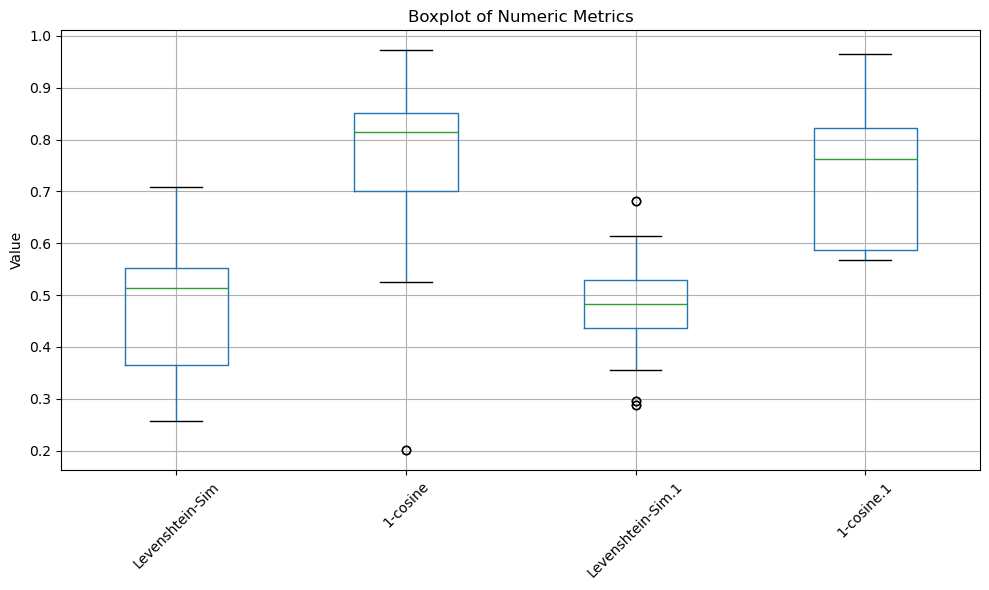

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to generate a boxplot from a CSV file
def generate_boxplot_from_csv(csv_path):
    # Read the CSV file
    df = pd.read_csv(csv_path)

    # Select only numeric columns (exclude strings like filenames or timestamps)
    numeric_columns = df.select_dtypes(include='number')

    if numeric_columns.empty:
        print("No numeric columns found in the file.")
        return

    # Create the boxplot
    plt.figure(figsize=(10, 6))
    numeric_columns.boxplot()
    plt.title("Boxplot of Numeric Metrics")
    plt.ylabel("Value")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Usage 
generate_boxplot_from_csv("results/HEPSYCODE/Diversity/Total.csv")